In [1]:
# Importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [2]:
def process_image(image):
    
    #grayscale the image
    gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
        
    # Define a kernel size and apply Gaussian smoothing
    kernel_size = 5
    blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
        
    # Define our parameters for Canny and apply
    low_threshold = 50
    high_threshold = 150
    edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
        
    # Next we'll create a masked edges image using cv2.fillPoly()
    mask = np.zeros_like(edges)   
    ignore_mask_color = 255
    y_top = 350
    y_bottom = 539
    vertices = np.array([[(150,y_bottom),(900,y_bottom),(670,y_top),(380,y_top)]], dtype=np.int32)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_edges = cv2.bitwise_and(edges, mask)

    # Define the Hough transform parameters
    rho = 0.5 # distance resolution in pixels of the Hough grid
    theta = np.pi/180/5 # angular resolution in radians of the Hough grid
    threshold = 3     # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 20 #minimum number of pixels making up a line
    max_line_gap = 10    # maximum gap in pixels between connectable line segments

    # Run Hough on edge detected image
    # Output "lines" is an array containing endpoints of detected line segments
    lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

        
    # Separate points between left and right lanes    
    points_right = np.zeros((1,2),dtype=int)
    points_left = np.zeros((1,2),dtype=int)
    for line in lines:
        for x1,y1,x2,y2 in line:
            #if (y2-y1)/(x2-x1) >= 0:
            if (x1 and x2) >= 480:
                points_right = np.concatenate((points_right,np.array([[x1, y1]])),axis=0)
                points_right = np.concatenate((points_right,np.array([[x2, y2]])),axis=0)
            else:
                points_left = np.concatenate((points_left,np.array([[x1, y1]])),axis=0)
                points_left = np.concatenate((points_left,np.array([[x2, y2]])),axis=0)
    points_right = np.delete(points_right,0,0)
    points_left = np.delete(points_left,0,0)

    # Find best fit for both lanes
    points_right_x = points_right[:,0]
    points_right_y = points_right[:,1]
    points_left_x = points_left[:,0]
    points_left_y = points_left[:,1]

    def linear_fit(x,y,y_ref):
        fit = np.polyfit(x,y,1)
        return (y_ref-fit[1])/fit[0]
    lane_y = [y_bottom, y_top]
    lane_right_x = linear_fit(points_right_x,points_right_y,lane_y)
    lane_left_x = linear_fit(points_left_x,points_left_y,lane_y)
    
    # Draw piped lines on original image
    piped_image = np.copy(image)*0 # creating a blank to draw lines on
    cv2.line(piped_image,(int(lane_right_x[0]),lane_y[0]),(int(lane_right_x[1]),lane_y[1]),(255,0,0),10)
    cv2.line(piped_image,(int(lane_left_x[0]),lane_y[0]),(int(lane_left_x[1]),lane_y[1]),(255,0,0),10)
    
    # Draw piped lines on the original colored image
    return cv2.addWeighted(image, 1, piped_image, 2, 0)


In [3]:
import os
os.listdir("test_images/")

['solidWhiteCurve.jpg',
 'solidWhiteRight.jpg',
 'solidYellowCurve.jpg',
 'solidYellowCurve2.jpg',
 'solidYellowLeft.jpg',
 'whiteCarLaneSwitch.jpg']

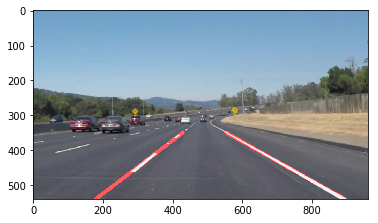

In [4]:
test_image = mpimg.imread('test_images/solidWhiteCurve.jpg')
plt.imshow(process_image(test_image))

In [5]:
# Import and process video
white_output = 'test_videos_output/solidWhiteRight.mp4'
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
duration = clip1.duration
white_clip = clip1.fl_image(process_image)
white_clip.set_duration(duration).write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/solidWhiteRight.mp4
[MoviePy] Writing video test_videos_output/solidWhiteRight.mp4


100%|███████████████████████████████████████▊| 221/222 [00:07<00:00, 31.19it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidWhiteRight.mp4 



In [6]:
# Import and process video
white_output = 'test_videos_output/solidYellowLeft.mp4'
clip2 = VideoFileClip("test_videos/solidYellowLeft.mp4")
duration = clip2.duration
white_clip = clip2.fl_image(process_image)
white_clip.set_duration(duration).write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/solidYellowLeft.mp4
[MoviePy] Writing video test_videos_output/solidYellowLeft.mp4


100%|███████████████████████████████████████▉| 681/682 [00:16<00:00, 40.58it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidYellowLeft.mp4 



In [7]:
# Import and process video
white_output = 'test_videos_output/challenge.mp4'
clip3 = VideoFileClip("test_videos/challenge.mp4")
duration = clip3.duration
white_clip = clip3.fl_image(process_image)
white_clip.set_duration(duration).write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/challenge.mp4
[MoviePy] Writing video test_videos_output/challenge.mp4


100%|████████████████████████████████████████| 251/251 [00:17<00:00, 15.19it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/challenge.mp4 

